In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Load Data

In [2]:
ds = pd.read_csv('../Covid_19_aggregated.csv', index_col=0)
print(ds.shape)
ds.head()

(29328, 80)


,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,C1_School closing,C2_Workplace closing,C3_Cancel public events,...,embeddingval11,embeddingval12,embeddingval13,embeddingval14,embeddingval15,embeddingval16,embeddingval17,embeddingval18,embeddingval19,embeddingval20
0,Afghanistan,33.0,65.0,01/22/2020,0,0,0,0.0,0.0,0.0,...,-0.005617,-0.01548,-0.006575,0.003086,-0.000472,0.024507,0.001705,0.020462,-0.002391,-0.021484
1,Afghanistan,33.0,65.0,01/23/2020,0,0,0,0.0,0.0,0.0,...,-0.005617,-0.01548,-0.006575,0.003086,-0.000472,0.024507,0.001705,0.020462,-0.002391,-0.021484
2,Afghanistan,33.0,65.0,01/24/2020,0,0,0,0.0,0.0,0.0,...,-0.005617,-0.01548,-0.006575,0.003086,-0.000472,0.024507,0.001705,0.020462,-0.002391,-0.021484
3,Afghanistan,33.0,65.0,01/25/2020,0,0,0,0.0,0.0,0.0,...,-0.005617,-0.01548,-0.006575,0.003086,-0.000472,0.024507,0.001705,0.020462,-0.002391,-0.021484
4,Afghanistan,33.0,65.0,01/26/2020,0,0,0,0.0,0.0,0.0,...,-0.005617,-0.01548,-0.006575,0.003086,-0.000472,0.024507,0.001705,0.020462,-0.002391,-0.021484


In [3]:
ds['Date_dt'] = pd.to_datetime(ds['Date'])

In [4]:
d_days = {str(date)[:10]: f'd_{idx}' for idx, date in enumerate(ds['Date_dt'].drop_duplicates().sort_values().values)}

In [5]:
ds['d_int'] = ds['Date_dt'].apply(lambda x: d_days[str(x)[:10]])

In [6]:
ds = ds.reset_index().set_index(['d_int','Country',])

In [7]:
conf_time_ds = pd.read_csv('../confirmed.csv', index_col=0)#.set_index('Country')
conf_time_ds = conf_time_ds.drop(['Population','Area','Density','GDP','handwashing_facilities',
                                 'hospital_beds_per_thousand','Airports','Lat','Long'], 1)
conf_time_ds.columns = [d_days[str(x)[:10]] for x in pd.to_datetime(conf_time_ds.columns)]
print(conf_time_ds.shape)
conf_time_ds.head()

(188, 156)


,d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26310.0,26874.0,27532.0,27878.0,28424.0,28833.0,29157.0,29481.0,29640.0,30175.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1672.0,1722.0,1788.0,1838.0,1891.0,1962.0,1995.0,2047.0,2114.0,2192.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11147.0,11268.0,11385.0,11504.0,11631.0,11771.0,11920.0,12076.0,12248.0,12445.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,854.0,854.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,148.0,155.0,166.0,172.0,176.0,183.0,186.0,189.0,197.0,212.0


In [8]:
renamed_cols = {'United States':'US','South Korea':'Korea, South','Taiwan':'Taiwan*'}

In [9]:
conf_time_diff_ds = (conf_time_ds.T-conf_time_ds.T.shift(1)).T.fillna(0)

In [10]:
conf_time_ds = conf_time_ds.rename(renamed_cols)
conf_time_diff_ds = conf_time_diff_ds.rename(renamed_cols)

In [11]:
death_time_ds = pd.read_csv('../deaths.csv', index_col=0)#.set_index('Country')
death_time_ds = death_time_ds.drop(['Population','Area','Density','GDP','handwashing_facilities',
                                 'hospital_beds_per_thousand','Airports','Lat','Long'], 1)
death_time_ds.columns = [d_days[str(x)[:10]] for x in pd.to_datetime(death_time_ds.columns)]
print(death_time_ds.shape)
death_time_ds.head()

(188, 156)


,d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,491.0,504.0,546.0,548.0,569.0,581.0,598.0,618.0,639.0,675.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,38.0,39.0,42.0,43.0,44.0,44.0,45.0,47.0,49.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,788.0,799.0,811.0,825.0,837.0,845.0,852.0,861.0,869.0,878.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,7.0,8.0,8.0,9.0,9.0,10.0,10.0,10.0,10.0


In [12]:
death_time_diff_ds = (death_time_ds.T-death_time_ds.T.shift(1)).T.fillna(0)

In [13]:
death_time_ds = death_time_ds.rename(renamed_cols)
death_time_diff_ds = death_time_diff_ds.rename(renamed_cols)

In [14]:
rec_time_ds = pd.read_csv('../deaths.csv', index_col=0)#.set_index('Country')
rec_time_ds = rec_time_ds.drop(['Population','Area','Density','GDP','handwashing_facilities',
                                 'hospital_beds_per_thousand','Airports','Lat','Long'], 1)
rec_time_ds.columns = [d_days[str(x)[:10]] for x in pd.to_datetime(rec_time_ds.columns)]
print(rec_time_ds.shape)
rec_time_ds.head()

(188, 156)


,d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,491.0,504.0,546.0,548.0,569.0,581.0,598.0,618.0,639.0,675.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,38.0,39.0,42.0,43.0,44.0,44.0,45.0,47.0,49.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,788.0,799.0,811.0,825.0,837.0,845.0,852.0,861.0,869.0,878.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,7.0,8.0,8.0,9.0,9.0,10.0,10.0,10.0,10.0


In [15]:
rec_time_diff_ds = (rec_time_ds.T-rec_time_ds.T.shift(1)).T.fillna(0)

In [16]:
rec_time_ds = rec_time_ds.rename(renamed_cols)
rec_time_diff_ds = rec_time_diff_ds.rename(renamed_cols)

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
def calc_time_agg(time_ds, date_start, date_end, f_name, lag_sizes=None, wnd_sizes=None, use_tqdm=True):
    lag_sizes = lag_sizes if lag_sizes is not None else [0,1,2,3,7,14]
    wnd_sizes = wnd_sizes if wnd_sizes is not None else [2,3,7,14]
    
    cdss = []
    for d_int in tqdm(range(date_start,date_end+1), disable=not use_tqdm):
        cds = time_ds[[]]
        cds['d_int'] = f"d_{d_int}"
        for lag_size in lag_sizes:    
            col_to_agg = d_int-lag_size
            new_col = f"{f_name}_lag{lag_size}"
            if col_to_agg >=0:
                cds[new_col] = time_ds.iloc[:,col_to_agg]
            else:
                cds[new_col] = None

        for wnd_size in wnd_sizes:
            cols_to_agg_min, cols_to_agg_max = d_int-wnd_size-1, d_int
            new_col = f"{f_name}_slmean{wnd_size}"
            if cols_to_agg_min>=0:
                cds[new_col] = time_ds.iloc[:,cols_to_agg_min:cols_to_agg_max].mean(1)
            else:
                cds[new_col] = None

        cdss.append(cds)
    cds = pd.concat(cdss)
    return cds

In [19]:
lag_sizes = [0,1,2,3,5,7,14,28]
wnd_sizes = [2,3,4,7,14,28]

In [20]:
conf_time_ds.columns

Index(['d_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9',
       ...
       'd_146', 'd_147', 'd_148', 'd_149', 'd_150', 'd_151', 'd_152', 'd_153',
       'd_154', 'd_155'],
      dtype='object', length=156)

In [21]:
from tqdm.notebook import tqdm

In [22]:
ds = ds.reset_index()

In [23]:
ds = ds.set_index('index')

In [25]:
key_ds = ds.reset_index()[['d_int','Country','index']]

In [31]:
#cds = calc_time_agg(conf_time_ds, 0, 155, 'Confirmed', lag_sizes=lag_sizes, wnd_sizes=wnd_sizes)
#cds = cds.reset_index().set_index(['d_int','Country'])
cds = cds.reset_index().merge(key_ds).set_index('index')
for f in cds.columns:
    ds[f] = cds[f]
cds = calc_time_agg(conf_time_diff_ds, 0, 155, 'Confirmed_diff', lag_sizes=lag_sizes, wnd_sizes=wnd_sizes)
#cds = cds.reset_index().set_index(['d_int','Country'])
cds = cds.reset_index().merge(key_ds).set_index('index')
for f in cds.columns:
    ds[f] = cds[f]

In [32]:
cds = calc_time_agg(death_time_ds, 0, 155, 'Deaths', lag_sizes=lag_sizes, wnd_sizes=wnd_sizes)
#cds = cds.reset_index().set_index(['d_int','Country'])
cds = cds.reset_index().merge(key_ds).set_index('index')
for f in cds.columns:
    ds[f] = cds[f]

cds = calc_time_agg(death_time_diff_ds, 0, 155, 'Deaths_diff', lag_sizes=lag_sizes, wnd_sizes=wnd_sizes)
#cds = cds.reset_index().set_index(['d_int','Country'])
cds = cds.reset_index().merge(key_ds).set_index('index')
for f in cds.columns:
    ds[f] = cds[f]

In [33]:
cds = calc_time_agg(rec_time_ds, 0, 155, 'Recovered', lag_sizes=lag_sizes, wnd_sizes=wnd_sizes)
#cds = cds.reset_index().set_index(['d_int','Country'])
cds = cds.reset_index().merge(key_ds).set_index('index')
for f in cds.columns:
    ds[f] = cds[f]

cds = calc_time_agg(rec_time_diff_ds, 0, 155, 'Recovered_diff', lag_sizes=lag_sizes, wnd_sizes=wnd_sizes)
#cds = cds.reset_index().set_index(['d_int','Country'])
cds = cds.reset_index().merge(key_ds).set_index('index')
for f in cds.columns:
    ds[f] = cds[f]

In [34]:
rec_time_diff_ds==death_time_diff_ds

,d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Albania,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Algeria,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Andorra,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Angola,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Antigua and Barbuda,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Argentina,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Armenia,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Australia,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [35]:
ds = ds.fillna(0)

In [36]:
ds.to_csv('agg_ds.csv')

In [37]:
ds = pd.read_csv('agg_ds.csv')

In [38]:
tda_conf_ds = pd.read_csv('../TDA_confirmed_anomalies.csv', index_col=0)
print(tda_conf_ds.shape)
tda_conf_ds.head()

(188, 8)


,TDA_anomaly_dict_1,TDA_anomaly_dict_2,TDA_anomaly_dict_3,TDA_anomaly_dict_4,TDA_final,TDA_final_code,TDA_final_short,TDA_final_short_code
Country,,,,,,,,
Afghanistan,1.0,1.0,1.0,9.0,"Rare infected, speed up in May",9,Outliers,6
Albania,3.0,1.0,2.0,16.0,Small infection in the end of March,10,Small infection in the end of March,4
Algeria,1.0,1.0,1.0,6.0,"Rare infected, speed3",7,"Rare infected, high speed",3
Andorra,3.0,8.0,16.0,16.0,"Small Countries, infected early March",14,Outliers,6
Angola,1.0,1.0,1.0,2.0,Never Infected,2,Never Infected,1


In [39]:
tda_conf_ds = tda_conf_ds.rename(renamed_cols)

In [40]:
ds['TDA_final_code'] = ds['Country'].apply(lambda x: tda_conf_ds.at[x, 'TDA_final_code'] if x in tda_conf_ds.index else None)
ds['TDA_final_short_code'] = ds['Country'].apply(lambda x: tda_conf_ds.at[x, 'TDA_final_short_code'] if x in tda_conf_ds.index else None)

In [41]:
ds['Confirmed_diff_lag0']==ds['Deaths_diff_lag0']

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
29298    False
29299    False
29300     True
29301    False
29302    False
29303    False
29304    False
29305    False
29306    False
29307    False
29308    False
29309    False
29310    False
29311    False
29312    False
29313    False
29314    False
29315    False
29316    False
29317    False
29318    False
29319    False
29320    False
29321    False
29322     True
29323    False
29324    False
29325    False
29326    False
29327    False
Length: 29328, dtype: bool

# EDA

In [42]:
import re

Define features and train test

In [43]:
cols_key = ['Country', 'd_int']
#assert ds[cols_key].drop_duplicates().shape[0]==ds.shape[0]
cols_target = ['Confirmed','Deaths','Recovered']
cols_geo = ['Lat','Long']
cols_policy = [f for f in ds.columns if re.match('[CEH]\d', f)] + ['M1_Wildcard']
cols_indexes = [f for f in ds.columns if f.endswith('Index')]
cols_perc_change = [f for f in ds.columns if '_percent_change_' in f]
cols_health = ['extreme_poverty', 'handwashing_facilities','hospital_beds_per_thousand']
cols_country_stat = ['Population', 'GrowthRate', 'Area', 'Density', 'Airports', 'GDP']
cols_tests = ['total_tests','new_tests','total_tests_per_thousand', 'new_tests_per_thousand','new_tests_smoothed', 'new_tests_smoothed_per_thousand']
cols_age = ['median_age','aged_65_older','aged_70_older','life_expectancy']
cols_ill = ['cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers']
cols_lag = [f for f in ds.columns if '_lag' in f and 'lag0' not in f]
cols_slmean = [f for f in ds.columns if '_slmean' in f]
cols_embed = [f for f in ds.columns if f.startswith('embeddingval')]
cols_tda = [f for f in ds.columns if 'TDA' in f]

In [44]:
ds.drop(cols_target+cols_geo+cols_policy+cols_indexes+\
        cols_perc_change+cols_health+cols_country_stat+\
        cols_tests+cols_age+cols_ill+cols_lag+cols_slmean+\
        cols_embed+cols_tda,1).columns

Index(['index', 'd_int', 'Country', 'Date', 'census_fips_code', 'Date_dt',
       'Confirmed_lag0', 'Confirmed_diff_lag0', 'Deaths_lag0',
       'Deaths_diff_lag0', 'Recovered_lag0', 'Recovered_diff_lag0'],
      dtype='object')

In [45]:
ds['Date_dt'].max()

'2020-06-25'

In [46]:
train_ids = (ds['Date_dt']>'2020-01-22')&(ds['Date_dt']<='2020-05-25')
test_ids = (ds['Date_dt']>='2020-05-26')&(ds['Date_dt']<='2020-06-25')
ds[train_ids]['Date'].nunique(), ds[test_ids]['Date'].nunique(),  ds[train_ids].shape, ds[test_ids].shape

(124, 31, (23312, 169), (5828, 169))

Add lag for values

In [47]:
from tqdm.notebook import tqdm

In [48]:
from scipy.stats import boxcox

In [49]:
ds = ds[['Congo' not in x for x in ds['Country']]]

In [50]:
ds = ds[~ds['Country'].isin(ds[ds['Confirmed_diff_lag0'].isna()]['Country'].unique())]

# Train baseline model

In [194]:
ds[cols_policy].describe().loc[['min','max']].T.head(8)

,min,max
C1_School closing,0.0,3.0
C2_Workplace closing,0.0,3.0
C3_Cancel public events,0.0,2.0
C4_Restrictions on gatherings,0.0,4.0
C5_Close public transport,0.0,2.0
C6_Stay at home requirements,0.0,3.0
C7_Restrictions on internal movement,0.0,2.0
C8_International travel controls,0.0,4.0


In [212]:
pd.timedelta_range?

In [222]:
from datetime import timedelta

In [223]:
[pd.to_datetime('2020-06-25')+timedelta(days=i) for i in range(90)]

[Timestamp('2020-06-25 00:00:00'),
 Timestamp('2020-06-26 00:00:00'),
 Timestamp('2020-06-27 00:00:00'),
 Timestamp('2020-06-28 00:00:00'),
 Timestamp('2020-06-29 00:00:00'),
 Timestamp('2020-06-30 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-07-02 00:00:00'),
 Timestamp('2020-07-03 00:00:00'),
 Timestamp('2020-07-04 00:00:00'),
 Timestamp('2020-07-05 00:00:00'),
 Timestamp('2020-07-06 00:00:00'),
 Timestamp('2020-07-07 00:00:00'),
 Timestamp('2020-07-08 00:00:00'),
 Timestamp('2020-07-09 00:00:00'),
 Timestamp('2020-07-10 00:00:00'),
 Timestamp('2020-07-11 00:00:00'),
 Timestamp('2020-07-12 00:00:00'),
 Timestamp('2020-07-13 00:00:00'),
 Timestamp('2020-07-14 00:00:00'),
 Timestamp('2020-07-15 00:00:00'),
 Timestamp('2020-07-16 00:00:00'),
 Timestamp('2020-07-17 00:00:00'),
 Timestamp('2020-07-18 00:00:00'),
 Timestamp('2020-07-19 00:00:00'),
 Timestamp('2020-07-20 00:00:00'),
 Timestamp('2020-07-21 00:00:00'),
 Timestamp('2020-07-22 00:00:00'),
 Timestamp('2020-07-

In [216]:
pd.timedelta_range('20-06-2020', freq='D', periods=90)

ValueError: only leading negative signs are allowed

In [210]:
pd.timedelta_range(pd.to_datetime('2020-06-25'), periods='days', aa)

ValueError: Value must be Timedelta, string, integer, float, timedelta or convertible

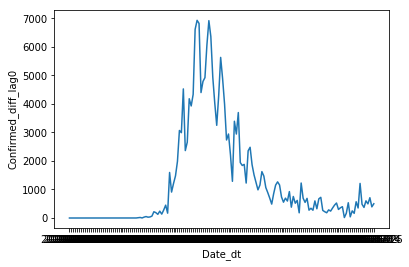

In [203]:
sns.lineplot(x='Date_dt', y='Confirmed_diff_lag0', data=ds[ds['Country']=='Germany'])

In [196]:
ds[cols_policy].describe().loc[['min','max']].T[8:]

,min,max
E1_Income support,0.0,2.000000e+00
E2_Debt/contract relief,0.0,2.000000e+00
E3_Fiscal measures,0.0,1.957600e+12
E4_International support,0.0,8.343531e+11
H1_Public information campaigns,0.0,2.000000e+00
H2_Testing policy,0.0,3.000000e+00
H3_Contact tracing,0.0,2.000000e+00
H4_Emergency investment in healthcare,0.0,2.424000e+11
H5_Investment in vaccines,0.0,1.390000e+09
M1_Wildcard,0.0,0.000000e+00


In [51]:
cols_predict = [f+'_diff_lag0' for f in cols_target]
cols_train_dict = {f+'_diff_lag0':[f_ for f_ in cols_geo+cols_policy+cols_indexes+cols_perc_change+cols_health\
    +cols_country_stat+cols_tests+cols_age+cols_ill+cols_lag+cols_slmean
                      if not any([t in f_ for t in cols_target if t!=f]) and not (f in f_ and 'diff' not in f_)]
                   for f in cols_target}

In [52]:
from catboost import CatBoostRegressor, Pool

In [184]:
cols_slmean

['Confirmed_slmean2',
 'Confirmed_slmean3',
 'Confirmed_slmean4',
 'Confirmed_slmean7',
 'Confirmed_slmean14',
 'Confirmed_slmean28',
 'Confirmed_diff_slmean2',
 'Confirmed_diff_slmean3',
 'Confirmed_diff_slmean4',
 'Confirmed_diff_slmean7',
 'Confirmed_diff_slmean14',
 'Confirmed_diff_slmean28',
 'Deaths_slmean2',
 'Deaths_slmean3',
 'Deaths_slmean4',
 'Deaths_slmean7',
 'Deaths_slmean14',
 'Deaths_slmean28',
 'Deaths_diff_slmean2',
 'Deaths_diff_slmean3',
 'Deaths_diff_slmean4',
 'Deaths_diff_slmean7',
 'Deaths_diff_slmean14',
 'Deaths_diff_slmean28',
 'Recovered_slmean2',
 'Recovered_slmean3',
 'Recovered_slmean4',
 'Recovered_slmean7',
 'Recovered_slmean14',
 'Recovered_slmean28',
 'Recovered_diff_slmean2',
 'Recovered_diff_slmean3',
 'Recovered_diff_slmean4',
 'Recovered_diff_slmean7',
 'Recovered_diff_slmean14',
 'Recovered_diff_slmean28']

In [182]:
cols_health

['extreme_poverty', 'handwashing_facilities', 'hospital_beds_per_thousand']

In [179]:
cols_geo+cols_policy+cols_indexes+cols_perc_change+cols_health\
    +cols_country_stat+cols_tests+cols_age+cols_ill+cols_lag+cols_slmean

['Lat',
 'Long',
 'C1_School closing',
 'C2_Workplace closing',
 'C3_Cancel public events',
 'C4_Restrictions on gatherings',
 'C5_Close public transport',
 'C6_Stay at home requirements',
 'C7_Restrictions on internal movement',
 'C8_International travel controls',
 'E1_Income support',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'M1_Wildcard',
 'StringencyIndex',
 'StringencyLegacyIndex',
 'GovernmentResponseIndex',
 'ContainmentHealthIndex',
 'EconomicSupportIndex',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline',
 'extreme_poverty',
 'handwashing_facilities',
 '

In [53]:
pool_train_dict = {f: Pool(ds.reset_index().loc[train_ids, cols_train_dict[f]], ds.reset_index().loc[train_ids, f]) for f in cols_predict}

In [54]:
cb_dict = {}
for f in cols_predict:
    cb = CatBoostRegressor()
    cb.fit(pool_train_dict[f], verbose=False, plot=True)
    cb_dict[f] = cb

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [55]:
for f in cb_dict.keys():
    cb_dict[f].save_model(f'../models/catboost_{f}.model')

# Test predictions

## One day prediction

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [57]:
def adj_r2(y_true, y_pred, X_train):
    return 1-(1-r2_score(y_true, y_pred))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

In [58]:
d_ints = ds.reset_index()['d_int'].unique()

In [59]:
n_days_forward = 1

In [60]:
ds = ds.set_index(['d_int','Country'])

In [61]:
ds['index'] = list(range(len(ds)))

In [62]:
ds = ds.reset_index().set_index('index')

In [63]:
key_ds = ds.reset_index()[['d_int','Country','index']]

In [64]:
def predict_ndays_forward(time_ds, ds, fname, d_ints, n_days_forward=1, use_tqdm=True):
    time_ds_preds = time_ds.copy()
    new_ds = ds.copy()
    for d_int in tqdm(d_ints, disable=not use_tqdm):
        d_int_prev = f"d_{int(d_int[2:])-1}"
        flg_prev = (ds.reset_index()['d_int']==d_int_prev).values
        flg_cur = (ds.reset_index()['d_int']==d_int).values
        
        cds = ds.reset_index()[flg_prev]
        pool = Pool(cds[cols_train_dict[fname]])
        preds = cb_dict[fname].predict(pool)
    
        preds_fname = f"{fname}_preds_{n_days_forward}day"
        cds[preds_fname] = preds
        new_ds.loc[flg_cur, preds_fname] = preds
        time_ds_preds[d_int] = cds.set_index('Country')[preds_fname]
    
        d_int_backward = f"d_{int(d_int[2:])-n_days_forward}"
        time_ds_preds[d_int_backward] = time_ds[d_int_backward]
        
        cds = calc_time_agg(time_ds, int(d_int[2:]), int(d_int[2:]), fname.replace('_lag0',''),
                            lag_sizes=[x for x in lag_sizes], wnd_sizes=wnd_sizes, use_tqdm=False)
        #cds = cds.reset_index().set_index(['d_int','Country'])
        cds = cds.merge(key_ds).set_index('index')
        for f in cds.columns:
            #ds.loc[cds.index, f] = cds[f]
            new_ds.loc[cds.index, f] = cds[f]
        for f in cds.columns:
            new_ds.loc[cds.index, f] = cds[f]
    return new_ds

In [66]:
ds_new = predict_ndays_forward(conf_time_diff_ds, ds, cols_predict[0], d_ints[31:-1], n_days_forward=30)
ds['Confirmed_diff_lag0_preds_30day'] = ds_new['Confirmed_diff_lag0_preds_30day']

In [67]:
cols_predict[1]

'Deaths_diff_lag0'

In [68]:
ds_new = predict_ndays_forward(death_time_diff_ds, ds, cols_predict[1], d_ints[31:-1], n_days_forward=30)
ds['Deaths_diff_lag0_preds_30day'] = ds_new['Deaths_diff_lag0_preds_30day']

In [69]:
ds_new = predict_ndays_forward(rec_time_diff_ds, ds, cols_predict[2], d_ints[31:-1], n_days_forward=30)
ds['Recovered_diff_lag0_preds_30day'] = ds_new['Recovered_diff_lag0_preds_30day']

In [76]:
xticks = ds['Date_dt'].drop_duplicates()[::14]

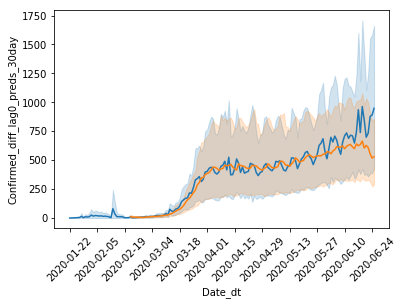

In [78]:
sns.lineplot(x='Date_dt', y='Confirmed_diff_lag0', data=ds)
#sns.lineplot(x='Date_dt', y='Confirmed_diff_lag0', data=ds_new)
sns.lineplot(x='Date_dt', y='Confirmed_diff_lag0_preds_30day', data=ds)
plt.xticks(xticks, xticks, rotation=45)
plt.show()

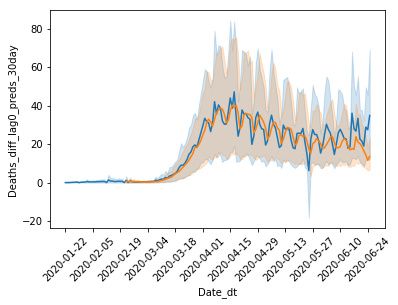

In [79]:
sns.lineplot(x='Date_dt', y='Deaths_diff_lag0', data=ds)
#sns.lineplot(x='Date_dt', y='Confirmed_diff_lag0', data=ds_new)
sns.lineplot(x='Date_dt', y='Deaths_diff_lag0_preds_30day', data=ds)
plt.xticks(xticks, xticks, rotation=45)
plt.show()

In [171]:
len(cols_train_dict[cols_predict[0]])

67

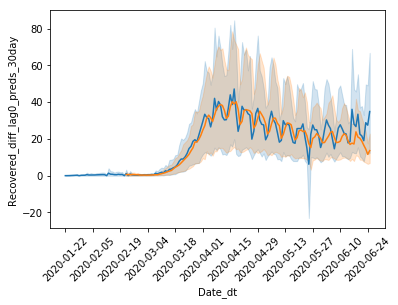

In [80]:
sns.lineplot(x='Date_dt', y='Recovered_diff_lag0', data=ds)
#sns.lineplot(x='Date_dt', y='Confirmed_diff_lag0', data=ds_new)
sns.lineplot(x='Date_dt', y='Recovered_diff_lag0_preds_30day', data=ds)
plt.xticks(xticks, xticks, rotation=45)
plt.show()

In [82]:
ds.to_csv('final_ds.csv')

In [ ]:
ds['C']

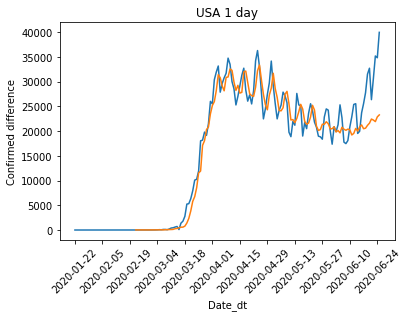

In [160]:
sns.lineplot(x='Date_dt', y='Confirmed_diff_lag0', data=ds[ds['Country']=='US'])
sns.lineplot(x='Date_dt', y='Confirmed_diff_lag0_preds_30day', data=ds[ds['Country']=='US'])
plt.xticks(xticks, xticks, rotation=45)
plt.title('USA 1 day')
plt.ylabel('Confirmed difference')
plt.show()

In [570]:
for f in cols_predict:
    pool_test= Pool(ds.loc[test_ids, cols_train], ds.loc[test_ids, f])
    preds_test = cb_dict[f].predict(pool_test)
    ds.loc[test_ids, f"{f}_preds_1day"] = preds_test
    
    preds_train = cb_dict[f].predict(pool_train_dict[f])
    ds.loc[train_ids, f"{f}_preds_1day"] = cb_dict[f].predict(pool_train_dict[f])

In [108]:
for t in cols_predict:
    p = Pool(ds[cols_train_dict[t]])
    preds = cb_dict[t].predict(p)
    ds[f"{t}_preds_1day"] = preds

In [109]:
for f in cols_predict:
    for country_name in ds['Country'].unique():
        cds = ds[ds['Country']==country_name].sort_values('Date_dt')
        s = cds[f"{f}_preds_1day"].cumsum()
        ds.loc[s.index, f.replace('_diff','')+'_preds_1day'] = s

In [115]:
for f in cols_predict:
    for country_name in ds['Country'].unique():
        cds = ds[ds['Country']==country_name].sort_values('Date_dt')
        s = cds[f"{f}_preds_30day"].cumsum()
        ds.loc[s.index, f.replace('_diff','')+'_preds_30day'] = s

In [592]:
ds = ds.set_index(['d_int','Country'])

In [612]:
cols_target

['Confirmed']

In [113]:
stat_ds = []
for ds_type in ['train','test']:
    scores = {'metric':'mean_absolute_error', 'dataset':ds_type}
    for f in cols_target:
        y_true = ds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = ds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_lag0_preds_1day"]
        scores[f] = mean_absolute_error(y_true, y_pred)
    stat_ds.append(scores)
    
    scores = {'metric':'MAPE', 'dataset':ds_type}
    for f in cols_target:
        y_true = ds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = ds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_lag0_preds_1day"]
        scores[f] = np.mean(np.abs(y_true-y_pred)/y_true)*100
    stat_ds.append(scores)
    
    scores = {'metric':'WAPE', 'dataset':ds_type}
    for f in cols_target:
        y_true = ds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = ds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_lag0_preds_1day"]
        scores[f] = np.sum(np.abs(y_true-y_pred))/np.sum(y_true)*100
    stat_ds.append(scores)
stat_ds = pd.DataFrame(stat_ds)[['dataset','metric']+cols_target]

In [114]:
stat_ds.pivot_table(index='metric',columns='dataset',values=cols_target).round(2).astype(str)

Confirmed          Deaths        Recovered         
dataset                  test   train    test  train      test    train
metric                                                                 
MAPE                   339.08     inf     inf    inf       inf      inf
WAPE                     6.47    6.83    8.44   9.32     91.16    85.47
mean_absolute_error   2566.43  537.31  187.59  48.56  16875.64  2154.21

In [617]:
cols_target

['Confirmed']

In [620]:
fimps = {}
for f in cols_target:
    f += '_diff_lag0'
    fimps[f] = pd.Series(cb_dict[f].get_feature_importance(), index=pool_train_dict[f].get_feature_names())
# cb_dict[cols_target[0]+'_diff'].get_feature_importance()

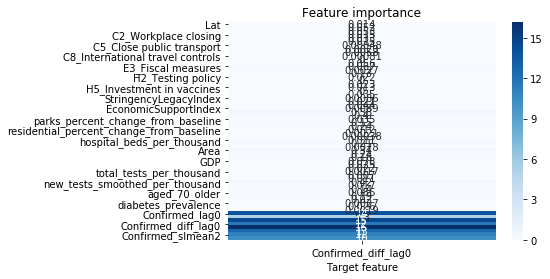

In [621]:
sns.heatmap(pd.DataFrame(fimps), cmap='Blues', annot=True)
plt.title('Feature importance')
plt.xlabel('Target feature')
plt.show()

In [29]:
flag_us = ds['Country']=='US'
flag_us.sum()

154

In [30]:
cds = ds[flag_us]

In [131]:
cols_target

['Confirmed', 'Deaths', 'Recovered']

In [31]:
stat_ds = []
for ds_type in ['train','test']:
    scores = {'metric':'adj_r2', 'dataset':ds_type}
    for f in cols_target:
        y_true = cds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = cds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_preds_1day"]
        scores[f] = adj_r2(y_true, y_pred, ds.loc[train_ids, cols_train])
        
    stat_ds.append(scores)
    
    scores = {'metric':'mean_absolute_error', 'dataset':ds_type}
    for f in cols_target:
        y_true = cds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = cds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_preds_1day"]
        scores[f] = mean_absolute_error(y_true, y_pred)
    stat_ds.append(scores)
    
    scores = {'metric':'MAPE', 'dataset':ds_type}
    for f in cols_target:
        y_true = cds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = cds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_preds_1day"]
        scores[f] = np.mean(np.abs(y_true-y_pred)/y_true)*100
    stat_ds.append(scores)
    
    scores = {'metric':'WAPE', 'dataset':ds_type}
    for f in cols_target:
        y_true = cds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = cds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_preds_1day"]
        scores[f] = np.sum(np.abs(y_true-y_pred))/np.sum(y_true)*100
    stat_ds.append(scores)
stat_ds = pd.DataFrame(stat_ds)[['dataset','metric']+cols_target]

In [33]:
print('USA CatBoost')
stat_ds.pivot_table(index='metric',columns='dataset',values=cols_target).round(4).astype(str).T

USA CatBoost


metric                MAPE    WAPE  adj_r2 mean_absolute_error
          dataset                                             
Confirmed test      1.7411  1.9613  0.8699          38690.9096
          train    80.4923  0.7118  0.9999           3049.7009
Deaths    test      0.7681  0.7774  0.9809            861.0514
          train        inf  0.4713     1.0            113.6187
Recovered test      5.2425  5.3665   0.864            27426.76
          train        inf  4.4155  0.9978             2641.29

In [176]:
print(stat_ds.pivot_table(index='metric',columns='dataset',values=cols_target).round(4).astype(str).T.to_latex())

\begin{tabular}{lllll}
\toprule
          & metric &      MAPE &     WAPE & mean\_absolute\_error \\
{} & dataset &           &          &                     \\
\midrule
Confirmed & test &  339.0801 &   6.4656 &            2566.428 \\
          & train &       inf &    6.829 &            537.3111 \\
Deaths & test &       inf &   8.4406 &            187.5874 \\
          & train &       inf &   9.3181 &             48.5568 \\
Recovered & test &       inf &   91.163 &          16875.6355 \\
          & train &       inf &  85.4658 &           2154.2066 \\
\bottomrule
\end{tabular}



In [126]:
ds.columns

Index(['d_int', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'C1_School closing', 'C2_Workplace closing',
       ...
       'Recovered_diff_lag0_preds_30day', 'Confirmed_diff_lag0_preds_1day',
       'Deaths_diff_lag0_preds_1day', 'Recovered_diff_lag0_preds_1day',
       'Confirmed_lag0_preds_1day', 'Deaths_lag0_preds_1day',
       'Recovered_lag0_preds_1day', 'Confirmed_lag0_preds_30day',
       'Deaths_lag0_preds_30day', 'Recovered_lag0_preds_30day'],
      dtype='object', length=180)

In [130]:
cols_predict

['Confirmed_diff_lag0', 'Deaths_diff_lag0', 'Recovered_diff_lag0']

In [154]:
y_true = ds.loc[test_ids][ds.loc[test_ids]['Country']=='US'][cols_target[1]]
y_preds = ds.loc[test_ids][ds.loc[test_ids]['Country']=='US'][cols_target[1]+"_lag0_preds_30day"]
mean_absolute_error(y_true, y_preds)

2315.9717934332793

In [156]:
np.sum(np.abs(y_true-y_pred))/np.sum(y_true)*100

98.87141570465351

In [157]:
y_true = ds.loc[test_ids][ds.loc[test_ids]['Country']=='Russia'][cols_target[1]]
y_preds = ds.loc[test_ids][ds.loc[test_ids]['Country']=='Russia'][cols_target[1]+"_lag0_preds_30day"]
mean_absolute_error(y_true, y_preds)

762.9784364681711

In [158]:
np.sum(np.abs(y_true-y_pred))/np.sum(y_true)*100

12.094605535108384

In [119]:
stat_ds_30 = []
for ds_type in ['train','test']:
    scores = {'metric':'mean_absolute_error', 'dataset':ds_type}
    for f in cols_target:
        y_true = ds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = ds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_lag0_preds_30day"].fillna(0)
        scores[f] = mean_absolute_error(y_true, y_pred)
    stat_ds_30.append(scores)
    
    scores = {'metric':'MAPE', 'dataset':ds_type}
    for f in cols_target:
        y_true = ds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = ds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_lag0_preds_30day"].fillna(0)
        scores[f] = np.mean(np.abs(y_true-y_pred)/y_true)*100
    stat_ds_30.append(scores)
    
    scores = {'metric':'WAPE', 'dataset':ds_type}
    for f in cols_target:
        y_true = ds.loc[train_ids if ds_type=='train' else test_ids, f]
        y_pred = ds.loc[train_ids if ds_type=='train' else test_ids, f"{f}_lag0_preds_30day"].fillna(0)
        scores[f] = np.sum(np.abs(y_true-y_pred))/np.sum(y_true)*100
    stat_ds_30.append(scores)
stat_ds_30 = pd.DataFrame(stat_ds_30)[['dataset','metric']+cols_target]

In [121]:
stat_ds_30.pivot_table(index='metric',columns='dataset',values=cols_target).round(2).astype(str).T

metric               MAPE   WAPE mean_absolute_error
          dataset                                   
Confirmed test     355.76   8.52             3382.03
          train       inf  12.89             1014.03
Deaths    test        inf   9.64               214.3
          train       inf  12.73               66.31
Recovered test        inf  91.31            16901.96
          train       inf  86.06              2169.2

In [174]:
print(stat_ds_30.pivot_table(index='metric',columns='dataset',values=cols_target).round(2).astype(str).T.to_latex())

\begin{tabular}{lllll}
\toprule
          & metric &    MAPE &   WAPE & mean\_absolute\_error \\
{} & dataset &         &        &                     \\
\midrule
Confirmed & test &  355.76 &   8.52 &             3382.03 \\
          & train &     inf &  12.89 &             1014.03 \\
Deaths & test &     inf &   9.64 &               214.3 \\
          & train &     inf &  12.73 &               66.31 \\
Recovered & test &     inf &  91.31 &            16901.96 \\
          & train &     inf &  86.06 &              2169.2 \\
\bottomrule
\end{tabular}



In [178]:
cols_train_dict[cols_predict[0]]

['Lat',
 'Long',
 'C1_School closing',
 'C2_Workplace closing',
 'C3_Cancel public events',
 'C4_Restrictions on gatherings',
 'C5_Close public transport',
 'C6_Stay at home requirements',
 'C7_Restrictions on internal movement',
 'C8_International travel controls',
 'E1_Income support',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'M1_Wildcard',
 'StringencyIndex',
 'StringencyLegacyIndex',
 'GovernmentResponseIndex',
 'ContainmentHealthIndex',
 'EconomicSupportIndex',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline',
 'extreme_poverty',
 'handwashing_facilities',
 '